In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV #2 arreglos, 1 con datos y 1 con etiquetas
from sklearn.svm import SVC
import numpy as np #Matemática
from sklearn.metrics import accuracy_score, make_scorer
import pandas as pd

In [2]:
data = pd.read_csv('DATA_DQPT_N=2_alpha=05_h=06465.txt')
data.keys()
data[['0', '0.1']]

,0,0.1
0,0.063467,0.000000
1,0.126933,0.000000
2,0.190400,0.000000
3,0.253866,0.000000
4,0.317333,0.000000
...,...,...
9994,6.029319,3.141593
9995,6.092786,3.141593
9996,6.156252,3.141593
9997,6.219719,3.141593


In [3]:
y = data['1']
x = data[['0', '0.1']]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) 

In [5]:
print(y_train.nunique())
print(y_test.nunique())

2
2


In [6]:
parameters = {'C':np.linspace(1e-3,15,1000), 'gamma':np.linspace(1e-3,1,1000)}

In [7]:
svm = SVC(kernel="rbf", gamma='auto')
scorer = make_scorer(accuracy_score)

In [8]:
grid_search = GridSearchCV(svm, parameters, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
print('Best C:',grid_search.best_params_)  
print('Best Score:',grid_search.best_score_) 

% de predicción:  0.5243333333333333


In [ ]:
prediction = grid_search.predict(X_test)

KeyboardInterrupt: ignored

In [ ]:
score = accuracy_score(y_test, prediction)
print('% de predicción: ', score)

Text(0, 0.5, 'Score')

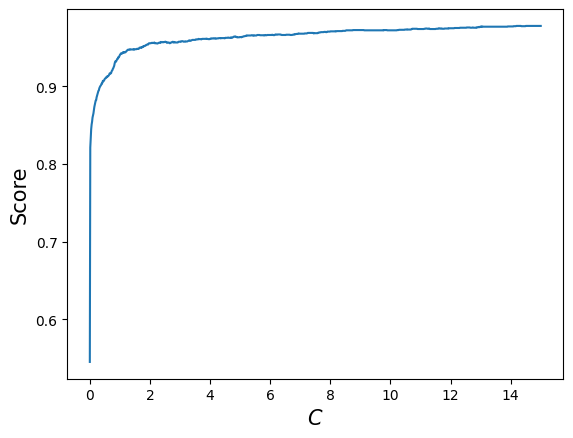

In [ ]:
plt.plot(grid_search.cv_results_['param_C'].data, grid_search.cv_results_['mean_test_score'])
plt.xlabel(r'$C$',fontsize = 15)
plt.ylabel(r'Score',fontsize = 15)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
X0, X1 = X_train.values[:, 0], X_train.values[:, 1]
xx, yy = np.meshgrid(np.arange(X0.min() - 1, X0.max() + 1, 0.02),
                     np.arange(X1.min() - 1, X1.max() + 1, 0.02))
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X0, X1, c=y_train, edgecolors='k')
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.title('SVC decision regions')
plt.show()